## CV for Fashion Item Classification with CNN

The global fashion industry is valued at well over one trillion USD https://www.statista.com/topics/5091/apparel-market-worldwide/#:~:text=The%20global%20apparel%20market%20is,the%20rise%20across%20the%20world

Like many industries, digital transformation offers a chance to revolutionize and radically change the game for fashion.

Given the visual aesthetic nature to fashion, it should come as no surprise that computer vision, a technology often associated with machine learning, can bring dramatic new services to the fashion industry. Imagine you had a personal AI assistant while shopping to help you choose the most flattering outfit to buy.

In this workbook, a model is developed using a dataset containing images of fashion items, like bags, dresses, and shoes. Using this data, the model is trained to be able to "see" these images in new sample images, and classify them appropraitely. For the classification, 10 unique classes exist.

Check out this video on the Amazon Echo Look to really see what this is about: https://www.youtube.com/watch?v=9X_fP4pPWPw&ab_channel=amazonfashion

### Dataset in Machine Learning Terms

The dataset used is called the Fashion MNIST dataset, available here: https://www.kaggle.com/zalando-research/fashionmnist

The dataset consists of 70,000 images. 60,0000 are training images, while 10,000 are testing images. Each image is 28x28 grayscale. This gives 784 pixels. Since each pixel is in greyscale, they are preseneted by a integer between 0 and 255 (0 representing black and 255 representing white). The objective is to build a classifier (using a deep learning neural network) that can look at the images and determine which target class the image belongs to. The classes include:
- T-Shirt/Top
- Trouser
- Pullover
- Dress
- Coat
- Sandal
- Shirt
- Sneaker
- Bag
- Heeled Boot

The target classification is as follows:
- T-Shirt/Top -> 0
- Trouser -> 1
- Pullover -> 2
- Dress -> 3
- Coat -> 4
- Sandal -> 5
- Shirt -> 6
- Sneaker -> 7
- Bag -> 8
- Heeled Shoe -> 9

### Data Visualization

In [1]:
# Import relevant 3rd party libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the datasets from local
training_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

In [3]:
# Inspect the head of training data dataframe
training_data.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


Colummn 0 represents the label. This will be separated as the target vector. 

In [4]:
# Inspect the tail of training data dataframe
training_data.tail(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59990,0,0,0,0,0,0,0,0,0,0,...,154,161,165,83,0,5,0,0,0,0
59991,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59992,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59993,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,141,113,9,0,0,0
59994,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Looks like all of the instances were correctly imported (expect 60_000, imported 60_000).

In [5]:
# Inspect the head of test data dataframe
test_data.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


Again, Column 0 represents the desired target vector.

In [6]:
# Inspect the tail of test data dataframe
test_data.tail(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9990,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9991,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9992,4,0,0,0,0,0,0,0,0,0,...,120,0,0,1,0,0,0,0,0,0
9993,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9994,0,0,0,0,0,0,0,0,1,0,...,85,67,114,51,0,1,0,0,0,0
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


And all instances imported as expected.

To double check that imports worked as expected, you can also use the .shape() method.

In [7]:
print (f'The shape of the training dataset is {training_data.shape}, and the shape of the test dataset is {test_data.shape}')

The shape of the training dataset is (60000, 785), and the shape of the test dataset is (10000, 785)


Using numpy, you can create arrays to better visualize and explore the data.

In [8]:
# Create training data array
training = np.array(training_data, dtype='float32')

In [9]:
# Create testing data array
testing = np.array(test_data, dtype='float32')

Suppose you were trying to visualize what the model will actually be trained on, you can use matplotlib.pyplot to do this:

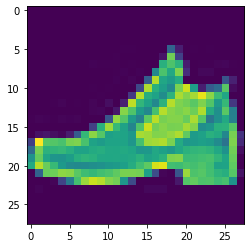

In [10]:
plt.imshow(training[1, 1:].reshape(28,28))

This is what the data in the 2nd row in the training dataset actually represents when formatted as a 28x28 image. Looks a bit like a heeled shoe. One can check what the label is by looking at 0th column value of the row.

In [11]:
print(f'The label of the above image is {int(training[1, 0])}.')

The label of the above image is 9.


As expected, the label is 9, corresponding to a heeled shoe.

The below code block, well speaks for itself.

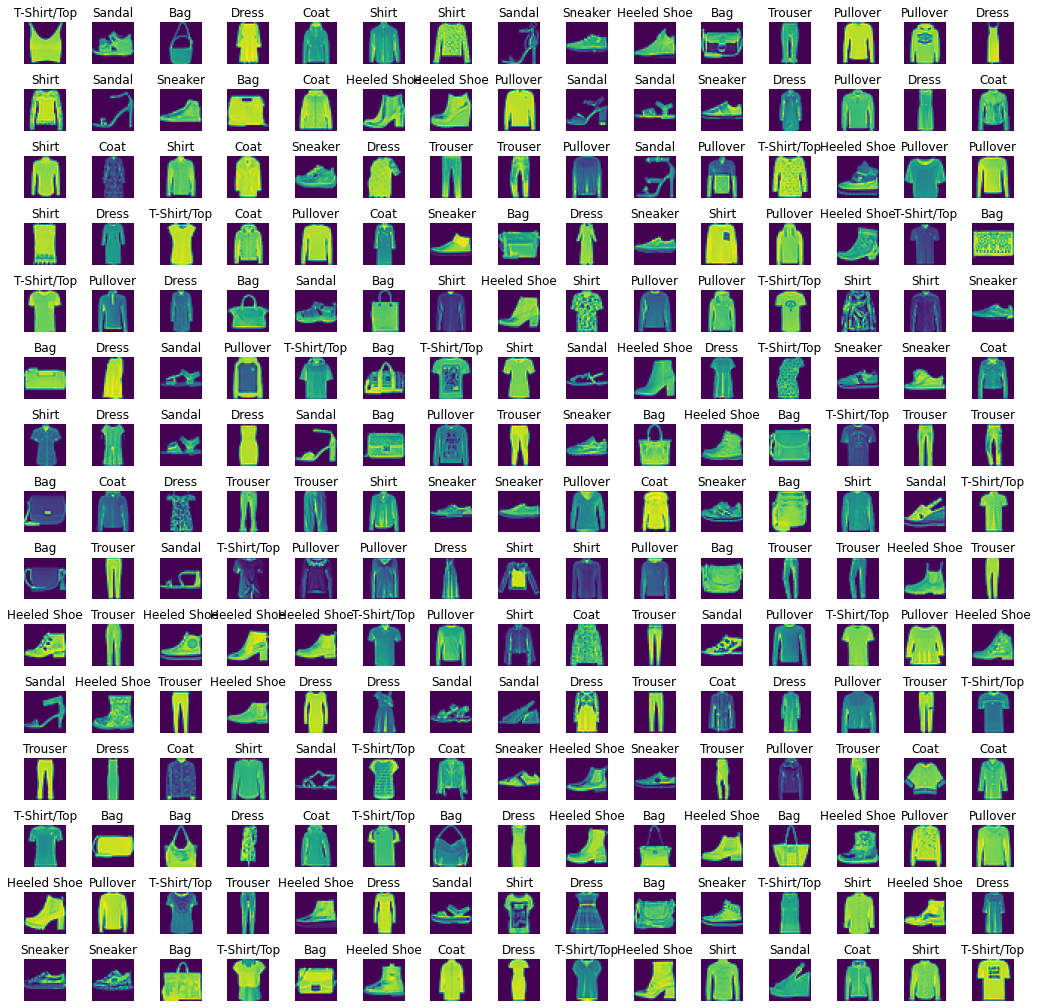

In [12]:
import random

label_dict = {0 : 'T-Shirt/Top',
              1: 'Trouser',
              2: 'Pullover',
              3: 'Dress',
              4: 'Coat',
              5: 'Sandal',
              6: 'Shirt',
              7: 'Sneaker',
              8: 'Bag',
              9: 'Heeled Shoe'}

width = 15
length = 15

fig, axes = plt.subplots(length, width, figsize = (18,18))

axes = axes.ravel()

n_training = len(training)

for i in np.arange(0, width * length):
    
    index = np.random.randint (0, n_training)
    
    axes[i].imshow(training[index, 1:].reshape((28,28)))
    axes[i].set_title(label_dict[int(training[index, 0])], fontsize=12)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.6)

### Model Training

To develop the model, a convolutional neural network (CNN) is used.

#### Convolution

- Convolutions use a kernal matrix to scan a given image and apply a filter to obtain certain effect.
- An image kernal is a matrix used to apply effects such as blurring and sharpening.
- Kernels are used in ML for **feature extraction** to select most important pixels of an image.
- Convolution preserves the spatial relationship between pixels (which is why one cannot just use the existing training dataset rows...the spatial relationship between pixels is not preserved).

#### Pooling

##### RELU

- RELU Layers are used to add non-linearrity in the feature map.
- They also enhance the sparsity.
- Unlike the sigmoid function, the gradient of the RELU does not vanish as X is increased.

##### Maxpooling/Flattening

- Pooling or down sampling layers are places after convolutional layesr to reduce feature map dimensionality.
- This improves the computational efficienty while preserving the features.
- Pooling helps the model to generalize by avoiding overfitting. If one of the pixels is shifted, the pooled feature map will still be the same. 
- Max pooling works by retaining the maximum feature response within a given sample size in a feature map.  
- Flattening involves taking the max pooled 2D-array and transforming it into a 1D-vector that can be fed to the input of the neural network.
  
The following link illustrates this: https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html

#### Training the Model

In [13]:
# Create test and train datasets

x_train = training[:, 1:] / 255 # Divide by 255 to apply normalization
y_train = training[:, 0]

x_test = testing[:, 1:] / 255 # Divide by 255 to apply normalization
y_test = testing[:, 0]

I'm also going to utilize a validation dataset to improve the results of the model.

In [14]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [15]:
# Create validation dataset from train dataset
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.15, random_state = 50534)

In [16]:
# Reshape data into 28x28x1 form for the CNN to be able to accept
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28, 28, 1))

If you don't have keras and tensorflow installed, you can install them with pip using the below code block

In [17]:
#pip install keras
#pip install tensorflow

In [18]:
# Import keras and keras objects to build neural network
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [19]:
# Build model in sequential form
# Create instance of Sequential obj
cnn = Sequential()

In [20]:
# Add convolution layer
cnn.add(Conv2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'))

In [21]:
# Add maxpooling layer
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
# Flatten 
cnn.add(Flatten())

In [23]:
# Add input layer
cnn.add(Dense(units=32, activation='relu'))

In [24]:
# Add output layer
cnn.add(Dense(units=10, activation='softmax'))

In [25]:
# Apply Adam optimizer
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [26]:
# Set epochs for training
epochs = 50

In [27]:
# Fit model
cnn.fit(x_train,
        y_train,
        batch_size=512,
        epochs = epochs,
        verbose=1,
        validation_data = (x_validate, y_validate))

Epoch 1/50
100/100 [==============================] - 0s 3ms/step - loss: 1.3586 - accuracy: 0.5622 - val_loss: 0.7779 - val_accuracy: 0.7276
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.7068 - accuracy: 0.7441 - val_loss: 0.6302 - val_accuracy: 0.7787
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.7780 - val_loss: 0.5692 - val_accuracy: 0.7958
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7953 - val_loss: 0.5431 - val_accuracy: 0.8092
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.8051 - val_loss: 0.5097 - val_accuracy: 0.8199
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.8109 - val_loss: 0.4962 - val_accuracy: 0.8239
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.8196 - val_loss: 0.4730 - val_accuracy: 0.8361
Epoch 

### Model Evaluation

In [28]:
# Check accuracy
evaluation = cnn.evaluate(x_test, y_test)
print(f'Test Accuracy: {evaluation[1]}')

313/313 [==============================] - 0s 950us/step - loss: 0.3470 - accuracy: 0.8723
Test Accuracy: 0.8723000288009644


In [29]:
# Create predicted classes array
predicted_classes = cnn.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


The below code block compares the predicted classes array from above with the actual classes of 25 images.

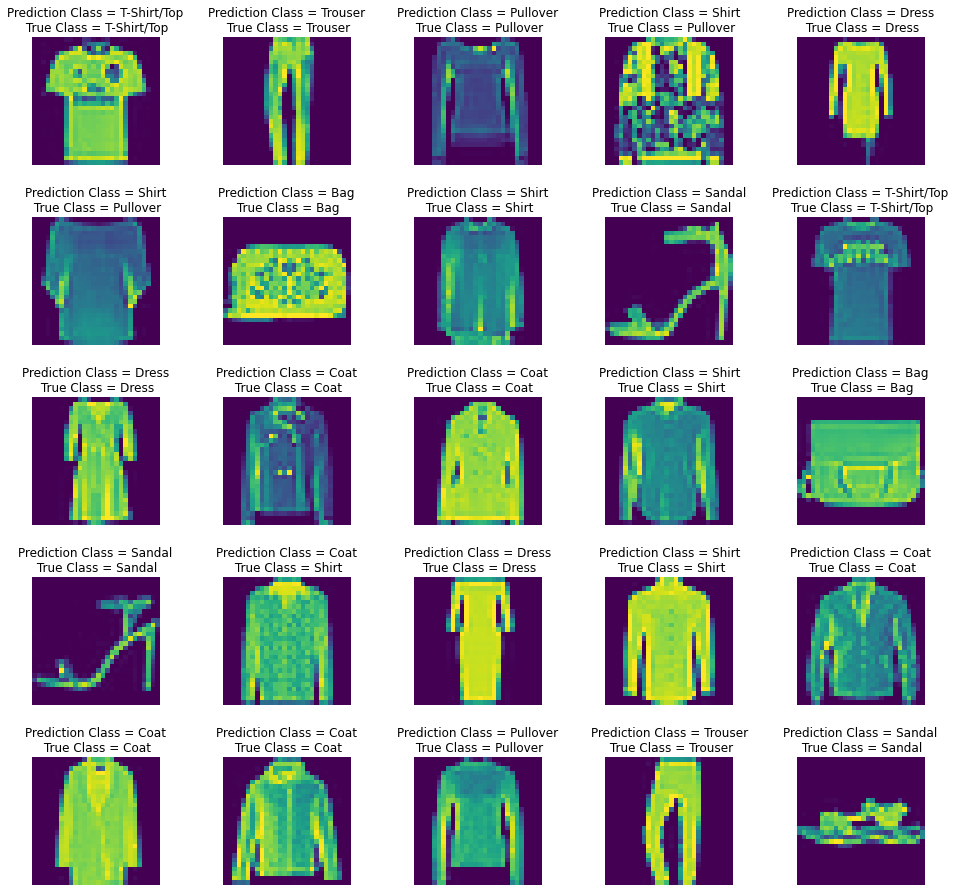

In [30]:
length = 5
width = 5
fig, axes = plt.subplots(length, width, figsize = (16, 16))
axes = axes.ravel()

for i in np.arange(0, length * width):
    axes[i].imshow(x_test[i].reshape(28, 28))
    axes[i].set_title(f'Prediction Class = {label_dict[int(predicted_classes[i])]}\n True Class = {label_dict[int(y_test[i])]}')
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

I'm also going to create a confusion matrix to analyze this.

<AxesSubplot:>

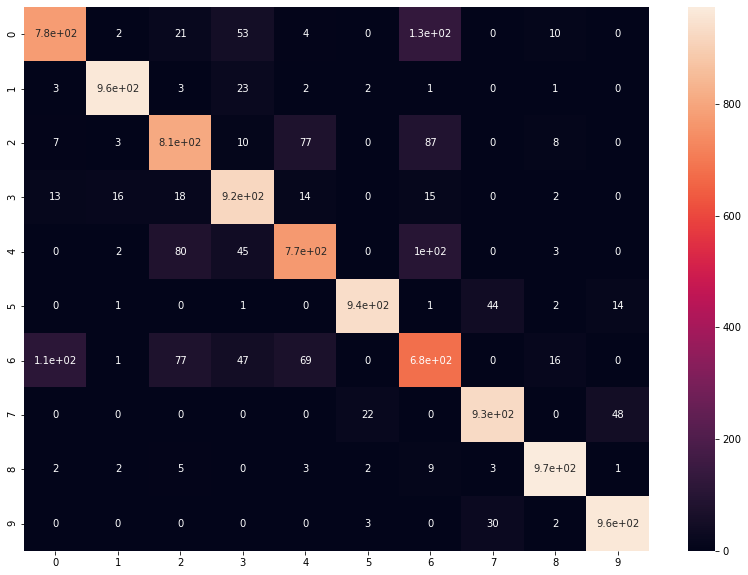

In [31]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14, 10))
sns.heatmap(conf_matrix, annot=True)

To analyze this, the y axis indicates what the true label was, while the x axis indicates the predicted label. Here's a quick reference:

- T-Shirt/Top -> 0
- Trouser -> 1
- Pullover -> 2
- Dress -> 3
- Coat -> 4
- Sandal -> 5
- Shirt -> 6
- Sneaker -> 7
- Bag -> 8
- Heeled Shoe -> 9

It is clear that the model struggled most with classifying T-Shirts/Tops as Shirts (understandably), and with identifying coats as either pullovers or shirts (also understandable).

Using sklearn, a report can be created.

In [32]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f'Class {i}' for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.78      0.81      1000
     Class 1       0.97      0.96      0.97      1000
     Class 2       0.80      0.81      0.80      1000
     Class 3       0.84      0.92      0.88      1000
     Class 4       0.82      0.77      0.79      1000
     Class 5       0.97      0.94      0.95      1000
     Class 6       0.66      0.68      0.67      1000
     Class 7       0.92      0.93      0.93      1000
     Class 8       0.96      0.97      0.96      1000
     Class 9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



### Improving the Model

There are several ways that the model can be improved. A quick list outlines them:
- Improve accuracy by addying more feature dectectors/filters or adding a dropout
 - Dropout refers to droping out units in a neural network
 - Neurons develop a co-dependency amongst each other during training
 - Droput is a regularization technique for reducing overfitting in neural networks
 - It enables training to occur on several architectures of the neural network
- It is also possible to add hidden layers to the neural network (layers between the input and output layer)
 - This can help to capture more relations between neurons
- By adjusting the number of epochs to train the model, performance can be increased
 - A caution is that if the number of epochs is too high then the model will be prone to overfitting

##### Specific Tuning

Below, several adjustments were made to the original model. These are as follows:
- Increased the number of epochs for training from 50 to 80
- Increased the number of filters in the convolution layer from 32 to 128
- Added three hidden layers with a dropout of 0.2
 - Each hidden layer had 5/3 the number of neurons as the input layer

In [33]:
# Set epochs to 80
epochs = 80
# Create instance of Sequential obj
cnn = Sequential()
# Add convolution layer with higher number of filters (64 or 128 are valid choices)
cnn.add(Conv2D(128, 3, 3, input_shape=(28, 28, 1), activation='relu'))
# Add maxpooling layer
cnn.add(MaxPooling2D(pool_size=(2,2)))
# Flatten 
cnn.add(Flatten())


# Add input layer
cnn.add(Dense(units=32, activation='relu'))
# Add first hidden layer
cnn.add(Dense(units=53, activation='relu'))
# Dropout on first hidden layer
cnn.add(Dropout(0.2))
# Add second hidden layer
cnn.add(Dense(units=53, activation='relu'))
# Dropout on second hidden layer
cnn.add(Dropout(0.2))
# Add third hidden layer
cnn.add(Dense(units=53, activation='relu'))
# Dropout on third hidden layer
cnn.add(Dropout(0.2))
# Add output layer
cnn.add(Dense(units=10, activation='softmax'))
# Apply Adam optimizer
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
# Fit model
cnn.fit(x_train,
        y_train,
        batch_size=512,
        epochs = epochs,
        verbose=1,
        validation_data = (x_validate, y_validate))

Epoch 1/80
100/100 [==============================] - 0s 5ms/step - loss: 1.4514 - accuracy: 0.4411 - val_loss: 0.7170 - val_accuracy: 0.7231
Epoch 2/80
100/100 [==============================] - 0s 4ms/step - loss: 0.7613 - accuracy: 0.7148 - val_loss: 0.5454 - val_accuracy: 0.7978
Epoch 3/80
100/100 [==============================] - 0s 4ms/step - loss: 0.6266 - accuracy: 0.7698 - val_loss: 0.5080 - val_accuracy: 0.8130
Epoch 4/80
100/100 [==============================] - 0s 4ms/step - loss: 0.5650 - accuracy: 0.7937 - val_loss: 0.4658 - val_accuracy: 0.8342
Epoch 5/80
100/100 [==============================] - 0s 4ms/step - loss: 0.5277 - accuracy: 0.8105 - val_loss: 0.4426 - val_accuracy: 0.8428
Epoch 6/80
100/100 [==============================] - 0s 4ms/step - loss: 0.4995 - accuracy: 0.8201 - val_loss: 0.4247 - val_accuracy: 0.8480
Epoch 7/80
100/100 [==============================] - 0s 4ms/step - loss: 0.4747 - accuracy: 0.8304 - val_loss: 0.4268 - val_accuracy: 0.8467
Epoch 

In [34]:
# Check accuracy
evaluation = cnn.evaluate(x_test, y_test)
print(f'Test Accuracy: {evaluation[1]}')

313/313 [==============================] - 0s 1ms/step - loss: 0.3672 - accuracy: 0.8920
Test Accuracy: 0.8920000195503235


### Conclusion

- By adding hidden layers, optimizing the number of epochs, and utilizing dropout it was possible to increase the performance of the model
- It is possible to use more advanced techniques using a richer dataset could be used to analyse colours, textures, and style (beyond just categorical classification)
- This technology is the basis of CV, allows computers to "perceive" and make decisions.